**Regression**

In [ ]:
import tensorflow as tf
v = tf.__version__
if v[0] == '2':
  print("Apropriate version!")
print(v)

Apropriate version!
2.7.0


Create Data

[-2 -1  0  1  2  3  4  5  6  7]
[-10  -7  -4  -1   2   5   8  11  14  17]


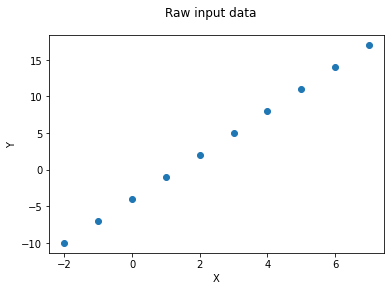

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(10) - 2;
Y = 3*X - 4;
print(X)
print(Y)

plt.suptitle('Raw input data')
plt.ylabel('Y')
plt.xlabel('X')
plt.scatter(X,Y)
plt.show()

Convert input/output to tensors

In [ ]:
X = tf.constant(X)
Y = tf.constant(Y)

print(X, Y)

tf.Tensor([-2 -1  0  1  2  3  4  5  6  7], shape=(10,), dtype=int64) tf.Tensor([-10  -7  -4  -1   2   5   8  11  14  17], shape=(10,), dtype=int64)



1.   Creating model with Keras
2.   Compiling the model
3.   Fitting the model (predict patterns)




In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 465ms/step - loss: 6.2468 - mae: 6.2468
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 6.1623 - mae: 6.1623
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 6.0778 - mae: 6.0778
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 5.9933 - mae: 5.9933
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 5.9088 - mae: 5.9088


Try the model

In [ ]:
X[4]

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
q = X[4]
Y1 = model.predict(X[4:6])
print(f"Real Y: {Y[4:6]}")
print(f"Predicted Y: {Y1}")

Real Y: [2 5]
Predicted Y: [[1.4401196]
 [2.1551795]]


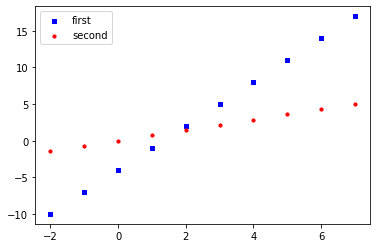

In [ ]:
Y_p = model.predict(X)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=10, c='b', marker="s", label='first')
ax1.scatter(X, Y_p, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

Change the number of Epochs

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 6.2468 - mae: 6.2468
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 6.1623 - mae: 6.1623
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 6.0778 - mae: 6.0778
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 5.9933 - mae: 5.9933
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 5.9088 - mae: 5.9088
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 5.8243 - mae: 5.8243
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 5.7398 - mae: 5.7398
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.6553 - mae: 5.6553
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 5.5708 - mae: 5.5708
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.4863 - mae: 5.4863
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 5.401

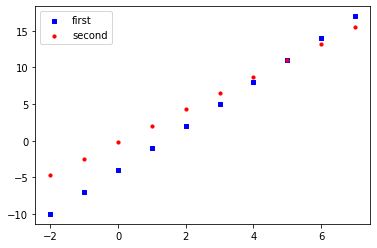

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Y_p = model.predict(X)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=10, c='b', marker="s", label='first')
ax1.scatter(X, Y_p, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

# Visualizing

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
Y = X + 10
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

**Traning and Test data**

In [ ]:
L = len(X)
training_inx = int(L * 0.8)
training_inx

X_train = X[:training_inx]
X_test  = X[training_inx:]
Y_train = Y[:training_inx]
Y_test  = Y[training_inx:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

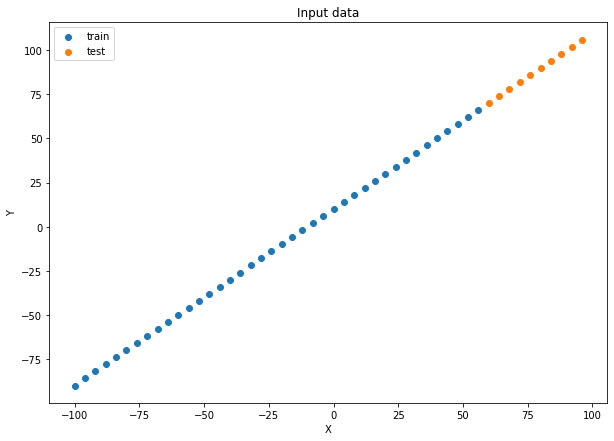

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Input data')
plt.ylabel('Y')
plt.xlabel('X')
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, label='test')
plt.legend()
plt.show()

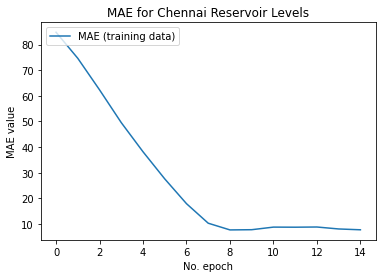

In [ ]:
tf.random.set_seed(54)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.003),
              metrics=["mae"])

history = model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=15, verbose=0)

Y_predict = model.predict(X_test)

# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

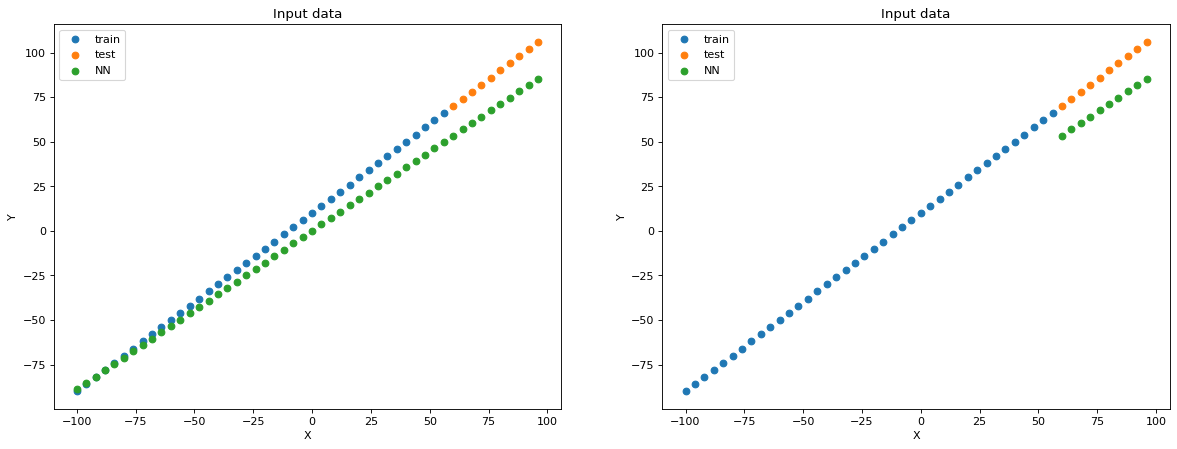

In [ ]:
plt.figure(figsize=(18, 14), dpi=80)

ax1 = plt.subplot(222)
ax1.set_title('Input data')
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
ax1.scatter(X_train, Y_train, label='train')
ax1.scatter(X_test, Y_test, label='test')
ax1.scatter(X_test, Y_predict, label='NN')
ax1.legend()

Y_predict_all = model.predict(X)
ax2 = plt.subplot(221)
ax2.set_title('Input data')
ax2.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.scatter(X_train, Y_train, label='train')
ax2.scatter(X_test, Y_test, label='test')
ax2.scatter(X, Y_predict_all, label='NN')
ax2.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.get_weights())

[array([[0.8893256]], dtype=float32), array([0.03075], dtype=float32)]


you can also view a 2D plot of the model using `plot_model()`

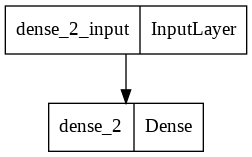

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

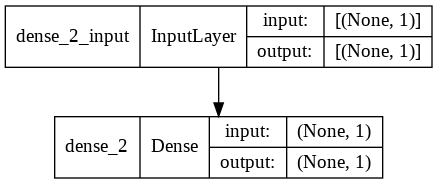

In [ ]:
plot_model(model, show_shapes=True)

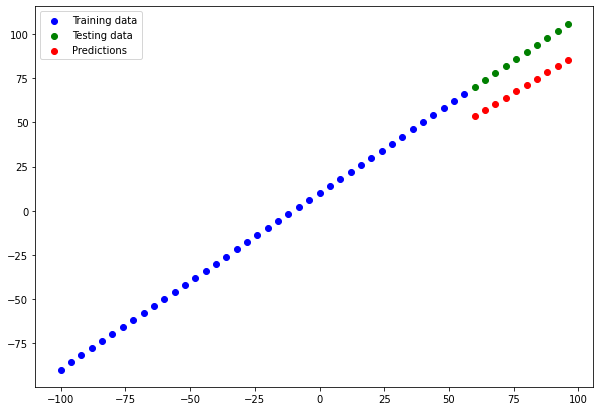

In [ ]:
def plot_predictions(train_data=X_train,
                     test_data=X_test,
                     train_labels=Y_train,
                     test_labels=Y_test,
                     predictions=Y_predict):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_predict)

Two of the main ***metrics*** used for regression problems are:



1.   **Mean absolute error** (*MAE*) - the mean difference between each of the predictions.
2.   **Mean squared error** (*MSE*) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).




In [ ]:
# To see the metrics on testing use 'evaluate'
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 124ms/step - loss: 18.6019 - mae: 18.6019


[18.601856231689453, 18.601856231689453]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test, 
                                     y_pred=Y_predict.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.601856>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=Y_predict.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=347.64584>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(Y_test-Y_predict.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.60185432434082>

It's a good idea to functionize anything you think you might use over again

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
  
def plot_mae(history, name="model"):
  """"
  Plot history: MAE
  """
  plt.plot(history.history['loss'], label='MAE (training data)')
  plt.title(name + " MAE for Chennai Reservoir Levels")
  plt.ylabel('MAE value')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper left")
  plt.show()


# Improve a model

---

I will make several models with different settings to find the best

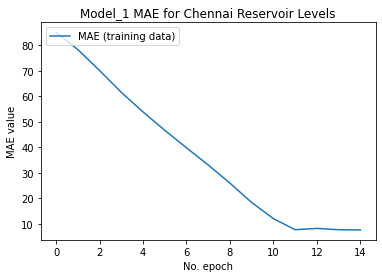

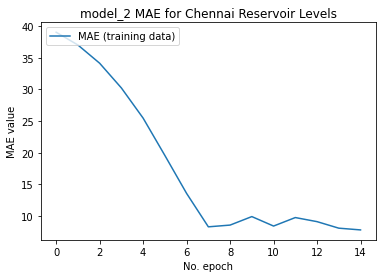

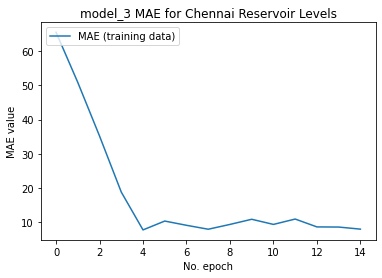

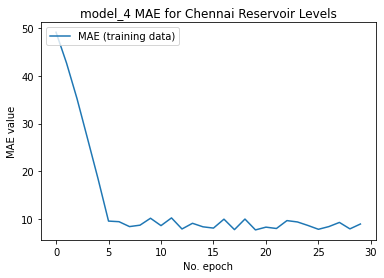

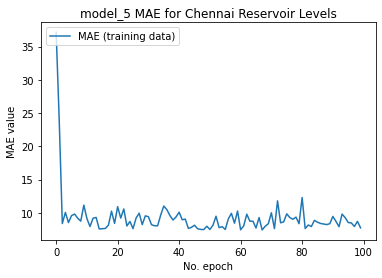

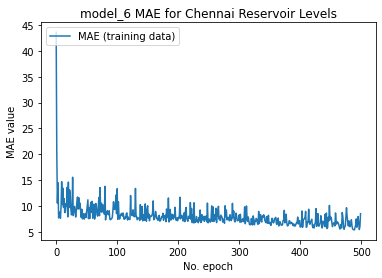

In [ ]:
tf.random.set_seed(54)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape = [1])
])

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape = [1]),
  tf.keras.layers.Dense(1, input_shape = [1])
])

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(3, input_shape = [1]),
  tf.keras.layers.Dense(1, input_shape = [3])
])

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(3, input_shape = [1]),
  tf.keras.layers.Dense(1, input_shape = [3])
])

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(3, input_shape = [1]),
  tf.keras.layers.Dense(1, input_shape = [3])
])

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(3, input_shape = [1]),
  tf.keras.layers.Dense(1, input_shape = [3])
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=15, verbose=0)
Y_predict = model_1.predict(X_test)
plot_mae(history, "Model_1")

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=15, verbose=0)
Y_predict = model_2.predict(X_test)
plot_mae(history, "model_2")

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=15, verbose=0)
Y_predict = model_3.predict(X_test)
plot_mae(history, "model_3")

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_4.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=30, verbose=0)
Y_predict = model_4.predict(X_test)
plot_mae(history, "model_4")

model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_5.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)
Y_predict = model_5.predict(X_test)
plot_mae(history, "model_5")

model_6.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
              metrics=["mae"])
history = model_6.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500, verbose=0)
Y_predict = model_6.predict(X_test)
plot_mae(history, "model_6")

In [ ]:
models = [model_1, model_2, model_3, model_4, model_5, model_6]
mae_m = []
mse_m = []
for model_m in models:
  y_predict = model_m.predict(X_test)
  mae_m.append(mae(Y_test, y_predict.squeeze()).numpy())
  mse_m.append(mse(Y_test, y_predict.squeeze()).numpy())

model_results = np.array([["model_1", "model_2", "model_3",
                           "model_4", "model_5", "model_6"],
                          mae_m, mse_m])

mse_m, mae_m

([365.9572, 320.88364, 282.85315, 743.8893, 1218.0222, 98.01178],
 [19.083088, 17.875156, 16.78802, 27.154816, 34.70303, 9.890276])

In [ ]:
model_results

array([['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6'],
       ['19.083088', '17.875156', '16.78802', '27.154816', '34.70303',
        '9.890276'],
       ['365.9572', '320.88364', '282.85315', '743.8893', '1218.0222',
        '98.01178']], dtype='<U9')

In [ ]:
model_results.transpose()

array([['model_1', '19.083088', '365.9572'],
       ['model_2', '17.875156', '320.88364'],
       ['model_3', '16.78802', '282.85315'],
       ['model_4', '27.154816', '743.8893'],
       ['model_5', '34.70303', '1218.0222'],
       ['model_6', '9.890276', '98.01178']], dtype='<U9')

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results.transpose(), columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,19.083088,365.9572
1,model_2,17.875156,320.88364
2,model_3,16.78802,282.85315
3,model_4,27.154816,743.8893
4,model_5,34.70303,1218.0222
5,model_6,9.890276,98.01178


A better way to conduct such experiments is to use **TensorBoard** and **Weights & Biases**

# Saving a model
Let's say I liked 3rd and 6th models. I want to save them to use later

In [ ]:
!mkdir -p saved_model
project_path = '/content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression'
model_3.save(project_path + '/saved_model/model_3') 
model_6.save(project_path + '/saved_model/model_6') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression/saved_model/model_3/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression/saved_model/model_6/assets


# Loading a model

In [ ]:
model = tf.keras.models.load_model(project_path + '/saved_model/model_6')
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 3)                 6         
                                                                 
 dense_54 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


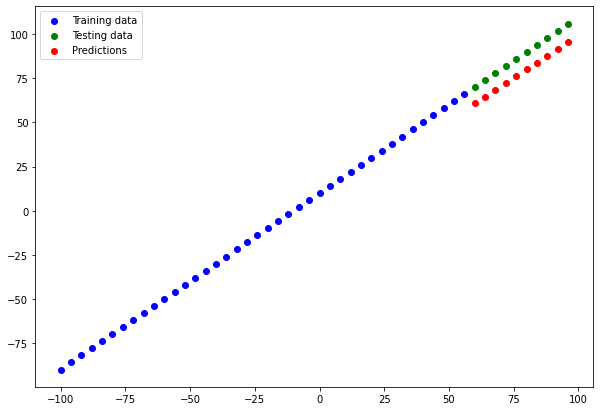

In [ ]:
Y_predict = model.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_predict)

# Downloading a model (from Google Colab)
не работает :(
  

In [ ]:
from google.colab import files
files.download("/content/saved_model/model_3")

# A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

In [ ]:
# Import of important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

v = tf.__version__
if v[0] == '2':
  print("Apropriate version!")
print(v)

Apropriate version!
2.7.0


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the `get_dummies()` method in pandas.

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop(['charges'], axis=1)
y = insurance_one_hot['charges']

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Create Test and Training sets
from sklearn.model_selection import train_test_split

# set random state for reproducible splits
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 11958.0107 - mae: 11958.0107
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7309.5537 - mae: 7309.5537
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7174.9976 - mae: 7174.9976
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7065.9248 - mae: 7065.9248
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6964.3511 - mae: 6964.3511
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6872.7124 - mae: 6872.7124
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6843.7510 - mae: 6843.7510
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6834.6841 - mae: 6834.6841
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6838.2822 - mae: 6838.2822
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6825.3491 - mae: 6825.34

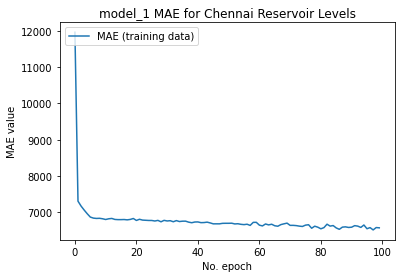

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(3),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
                        metrics=['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs=100)
plot_mae(history, "model_1")

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6981.2598 - mae: 6981.2598


[6981.259765625, 6981.259765625]

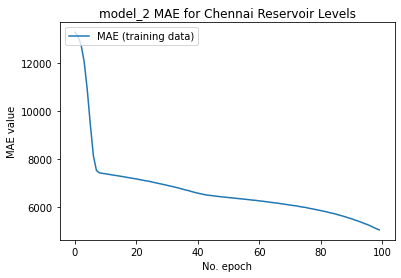

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)
plot_mae(history, "model_2")

From this, it looks like our model's loss was still decreasing

What this tells us is the loss might go down if we try *training it for **longer**.*

In [ ]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

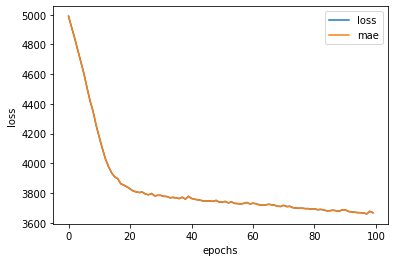

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# Preprocessing data
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

**With neural networks you'll tend to favour normalization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)
# TRY TO CHANGE X_train to X

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

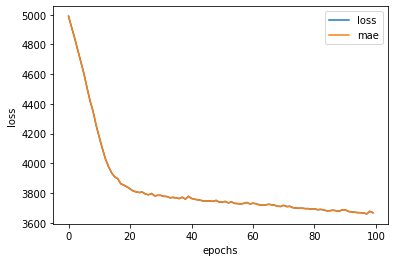

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

# Plot the model loss over epochs
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); 

In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3494.728515625, 3171.577392578125)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

**This is one of the main benefits of normalization**: faster convergence time (a fancy way of saying, your model gets to better results faster).

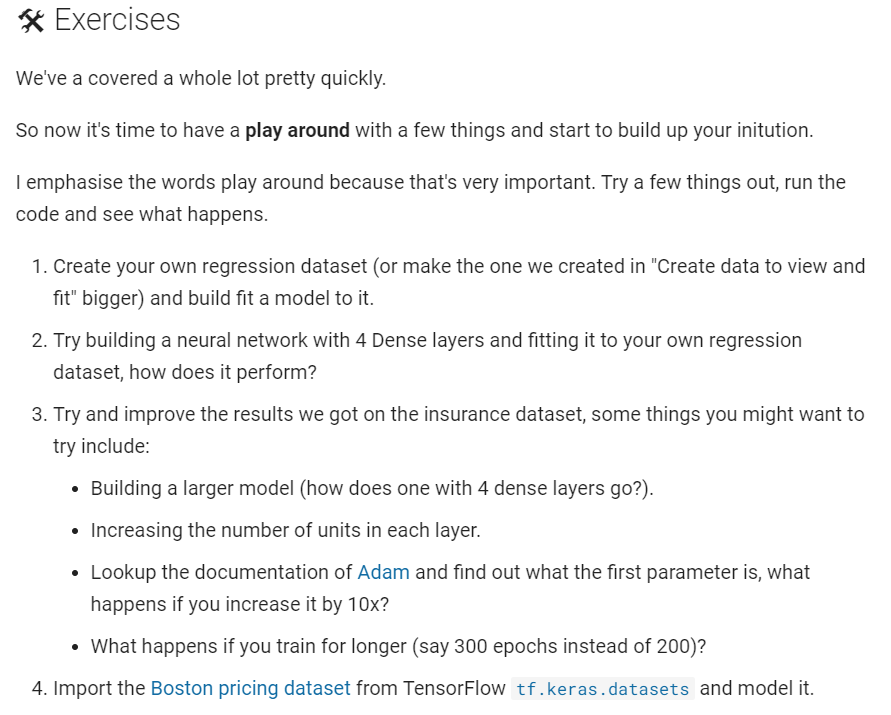

# My own experiments

In [36]:
# Import of important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.version.VERSION

'2.7.0'

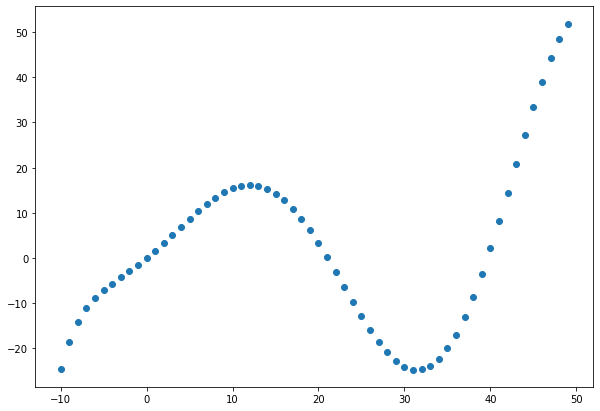

In [37]:
# Creating data
X = np.arange(-10, 50, 1)
y = np.exp(-X/8) * np.power(X, 3) / 200          \
    + 10 * np.exp(X/30) * np.sin(2*np.pi*X/40)

plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.show()

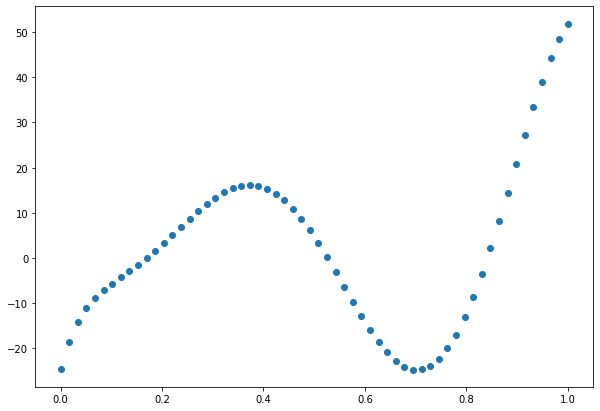

In [38]:
# Data normalization
X_norm = X - np.min(X)
X_norm = X_norm / np.max(X_norm)

plt.figure(figsize=(10, 7))
plt.scatter(X_norm, y)
plt.show()

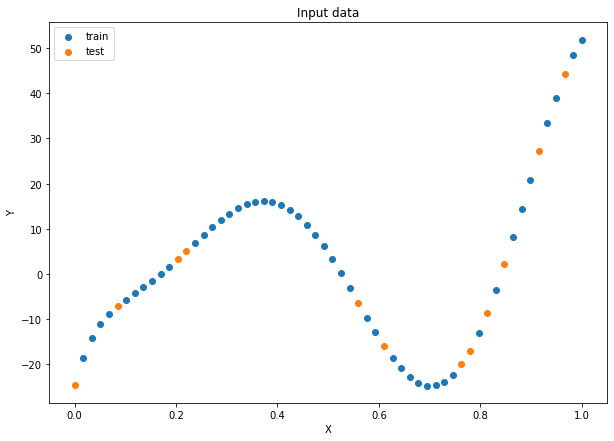

In [39]:
# Testing and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(   \
              X_norm, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 7))
plt.title('Input data')
plt.ylabel('Y')
plt.xlabel('X')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [41]:
X_test.size, X_train.size

(12, 48)

In [44]:
X_test.size, y_test.size

(12, 12)

In [99]:
X_train[:10]

array([0.52542373, 0.05084746, 0.88135593, 0.28813559, 0.13559322,
       0.10169492, 0.6779661 , 0.06779661, 0.72881356, 0.3220339 ])

In [98]:
X_train_tf = tf.expand_dims(X_train, axis=-1)
X_train_tf[:10]

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[0.52542373],
       [0.05084746],
       [0.88135593],
       [0.28813559],
       [0.13559322],
       [0.10169492],
       [0.6779661 ],
       [0.06779661],
       [0.72881356],
       [0.3220339 ]])>

In [84]:
# Creating several models to conduct experiments
tf.random.set_seed(42)

# Define models
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),                             
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),                             
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),                             
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),  
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),                           
  tf.keras.layers.Dense(1)
])

# Compile models
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

model_3.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])
model_4.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])
model_5.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])
model_6.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])


# Fit models
history_1 = model_1.fit(X_train_tf, y_train, epochs=3000, verbose=0)
history_2 = model_2.fit(X_train_tf, y_train, epochs=3000, verbose=0)
history_3 = model_3.fit(X_train_tf, y_train, epochs=3000, verbose=0)
history_4 = model_4.fit(X_train_tf, y_train, epochs=3000, verbose=0)
history_5 = model_5.fit(X_train_tf, y_train, epochs=3000, verbose=0)
history_6 = model_6.fit(X_train_tf, y_train, epochs=3000, verbose=0)

# Evaluate models
model_1.evaluate(X_test, y_test)
model_2.evaluate(X_test, y_test)
model_3.evaluate(X_test, y_test)
model_4.evaluate(X_test, y_test)
model_5.evaluate(X_test, y_test)
model_6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 2.1925 - mse: 2.1925


[2.192538022994995, 2.192538022994995]

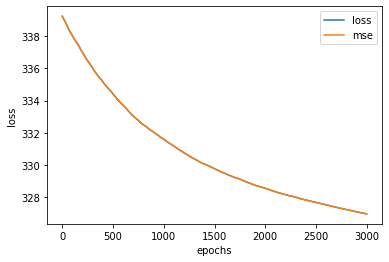

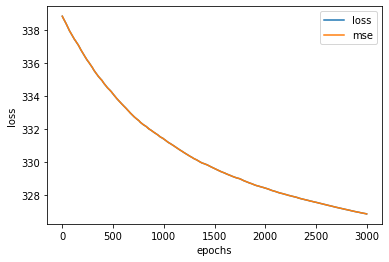

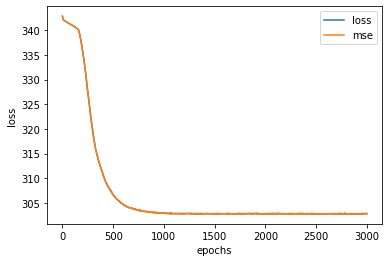

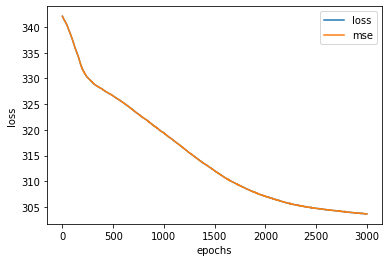

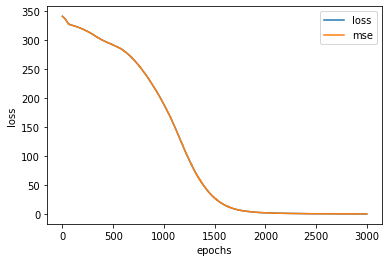

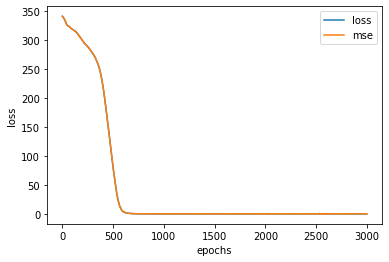

In [85]:
# Plot the model loss over epochs
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()

Seems like non of the models really learned with 'SGD' optimizer. Changed to Adam
Didn't get satisfaction from results. Will set a table of 'MSE' and then continue developing NN...

After hour of experiments I found a model - **model_5** and **model_6** which suits my needs and has really low error. Now I can Use this model for my project

Let's look at them

In [76]:
model_5.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 100)               200       
                                                                 
 dense_170 (Dense)           (None, 25)                2525      
                                                                 
 dense_171 (Dense)           (None, 1)                 26        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


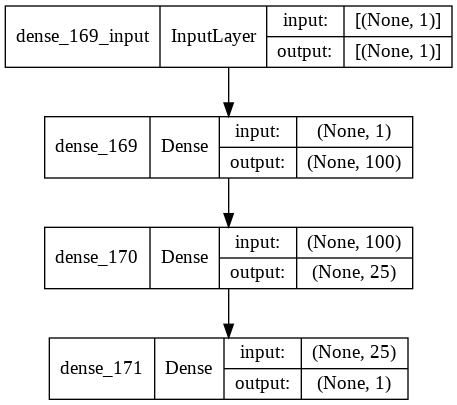

In [78]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, show_shapes=True)

In [86]:
model_6.summary()

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 100)               200       
                                                                 
 dense_187 (Dense)           (None, 50)                5050      
                                                                 
 dense_188 (Dense)           (None, 25)                1275      
                                                                 
 dense_189 (Dense)           (None, 1)                 26        
                                                                 
Total params: 6,551
Trainable params: 6,551
Non-trainable params: 0
_________________________________________________________________


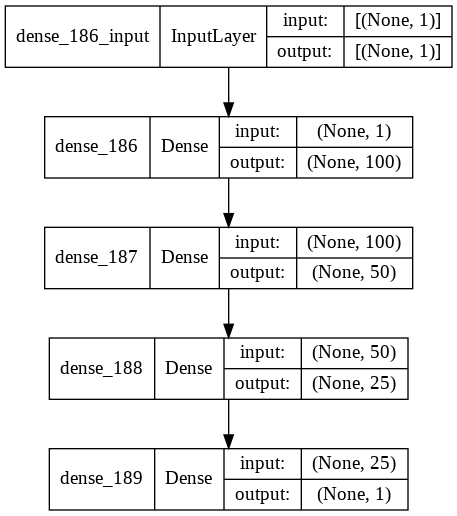

In [87]:
plot_model(model_6, show_shapes=True)

Models #5 and #6 showed best learning results. Will show their predictions

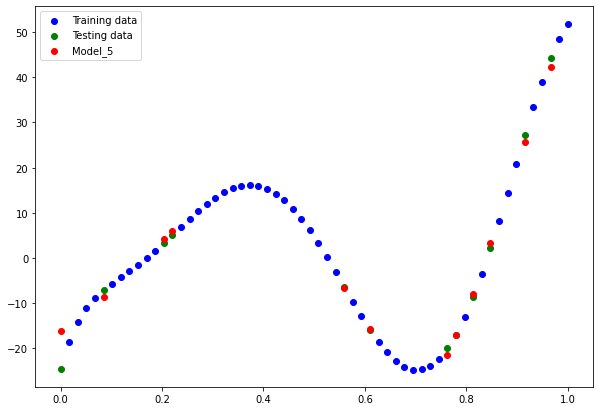

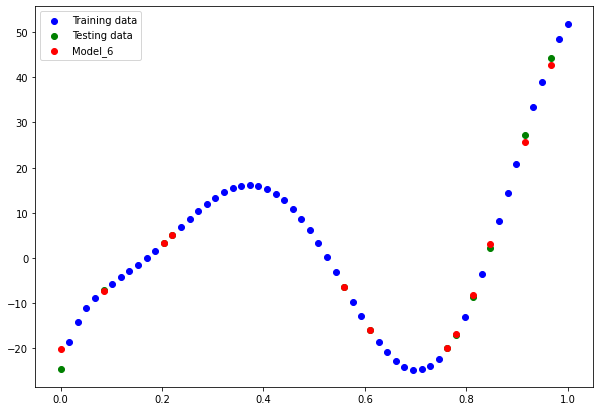

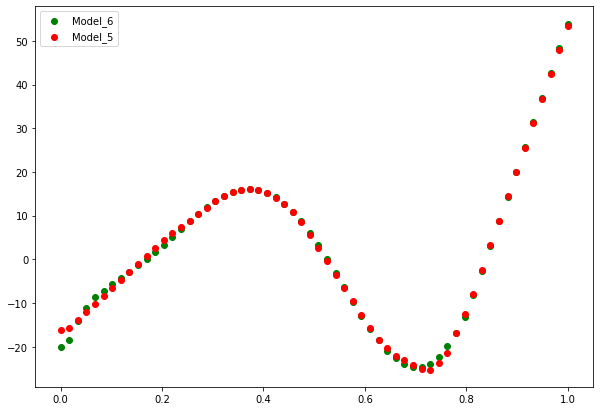

In [91]:
y_predict_test_5 = model_5.predict(X_test)
y_predict_test_6 = model_6.predict(X_test)
y_predict_5 = model_5.predict(X_norm)
y_predict_6 = model_6.predict(X_norm)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(X_test, y_predict_test_5, c="r", label="Model_5")
plt.legend();
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(X_test, y_predict_test_6, c="r", label="Model_6")
plt.legend();
plt.show()


plt.figure(figsize=(10, 7))
plt.scatter(X_norm, y_predict_6, c="g", label="Model_6")
plt.scatter(X_norm, y_predict_5, c="r", label="Model_5")
plt.legend();
plt.show()

Just for comparison we can look at model 4th which work much worser

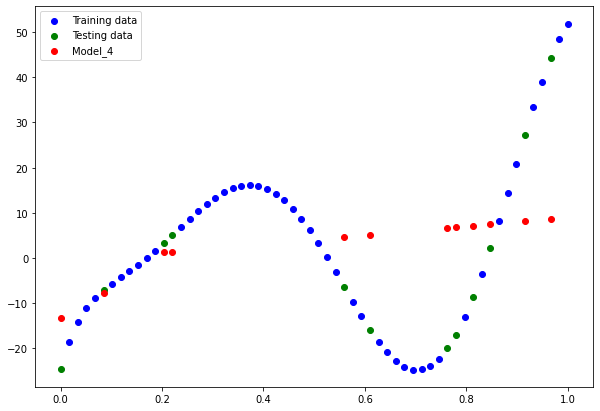

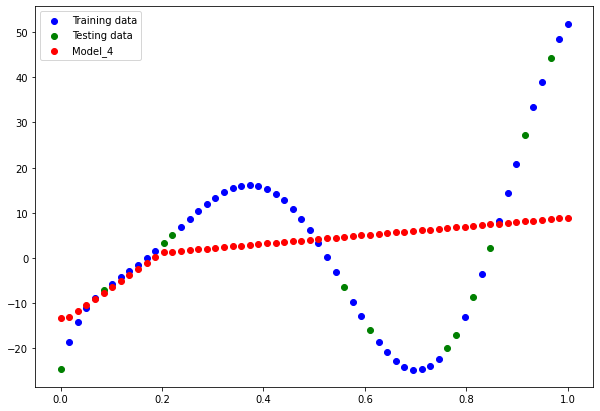

In [92]:
y_predict_test_4 = model_4.predict(X_test)
y_predict_4 = model_4.predict(X_norm)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(X_test, y_predict_test_4, c="r", label="Model_4")
plt.legend();
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(X_norm, y_predict_4, c="r", label="Model_4")
plt.legend();
plt.show()

Now I can easily fave the model

In [94]:
# Save the model
!mkdir -p saved_model
project_path = '/content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression'
model_5.save(project_path + '/saved_model/Experiment_good_model_5') 
model_6.save(project_path + '/saved_model/Experiment_good_model_6') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression/saved_model/Experiment_good_model_5/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression/saved_model/Experiment_good_model_6/assets


Example how to load it

In [95]:
model_working = tf.keras.models.load_model(project_path + '/saved_model/Experiment_good_model_5')
model_working.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 100)               200       
                                                                 
 dense_184 (Dense)           (None, 25)                2525      
                                                                 
 dense_185 (Dense)           (None, 1)                 26        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


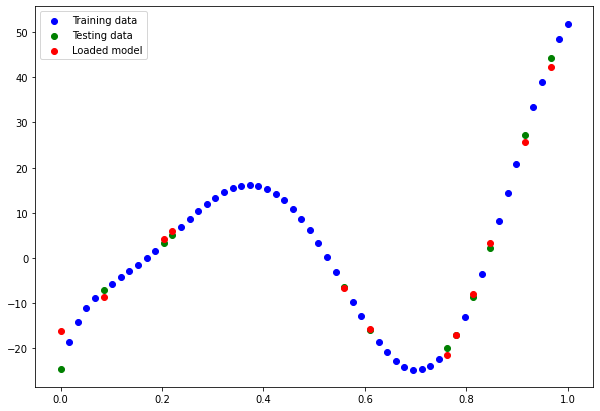

In [96]:
y_p = model_working.predict(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(X_test, y_p, c="r", label="Loaded model")
plt.legend();
plt.show()

# My example with real database

In [70]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.version.VERSION

'2.7.0'

In [71]:
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [72]:
# Visualize data
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [73]:
df_x_train = pd.DataFrame(data=x_train)
df_x_test = pd.DataFrame(data=x_test)
df_x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [74]:
df_y = pd.DataFrame(data=y_train)
df_y.head()

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [75]:
# Preprocessing

scaler = MinMaxScaler()
df_x_test = pd.DataFrame(scaler.fit_transform(df_x_test))
df_x_train = pd.DataFrame(scaler.fit_transform(df_x_train))

df_x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512


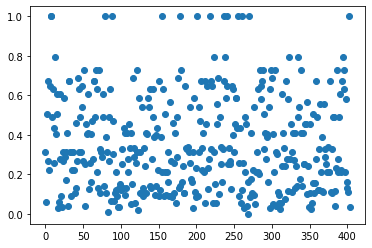

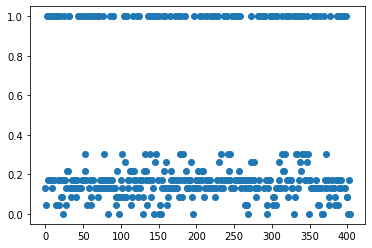

In [76]:
# Visualize normalization
a = np.array(df_x_train)
t = np.arange(a.shape[0])

plt.scatter(t, a[:,4])
plt.show()

plt.scatter(t, a[:,8])
plt.show()

In [77]:
X_train_norm = np.asarray(df_x_train)
X_test_norm = np.asarray(df_x_test)

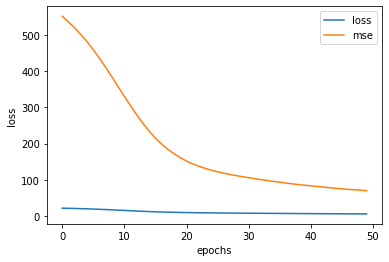

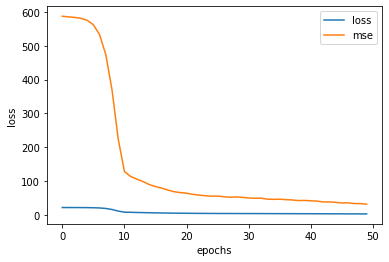

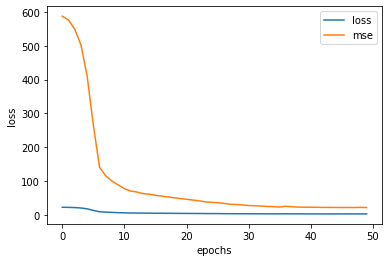

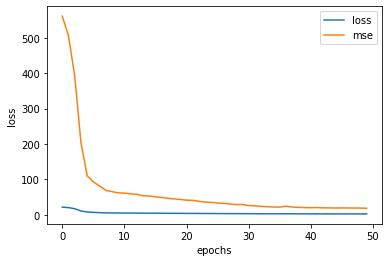

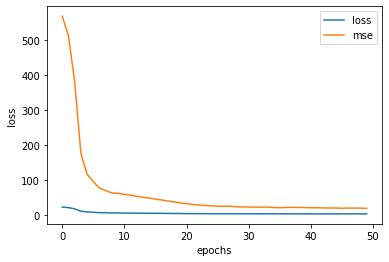

In [78]:
# Create and train several models to conduct experiment
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])

history_1 = model_1.fit(X_train_norm, y_train, epochs=50, verbose=0)
history_2 = model_2.fit(X_train_norm, y_train, epochs=50, verbose=0)
history_3 = model_3.fit(X_train_norm, y_train, epochs=50, verbose=0)
history_4 = model_4.fit(X_train_norm, y_train, epochs=50, verbose=0)
history_5 = model_5.fit(X_train_norm, y_train, epochs=50, verbose=0)

pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()

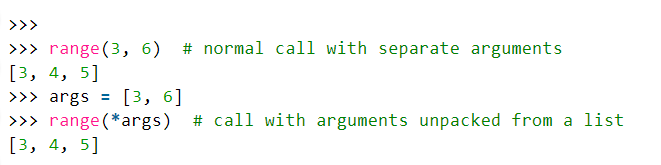

Packing unpacking with * 

In [79]:
# Testing models
test_1 = model_1.evaluate(X_test_norm, y_test)
test_2 = model_2.evaluate(X_test_norm, y_test)
test_3 = model_3.evaluate(X_test_norm, y_test)
test_4 = model_4.evaluate(X_test_norm, y_test)
test_5 = model_5.evaluate(X_test_norm, y_test)

model_results = [['model_1', *test_1], 
                 ['model_2', *test_2],
                 ['model_3', *test_3],
                 ['model_4', *test_4],
                 ['model_5', *test_5]]
model_results

4/4 [==============================] - 0s 3ms/step - loss: 5.3203 - mse: 40.5491


[['model_1', 6.41972017288208, 80.32449340820312],
 ['model_2', 5.277189254760742, 46.40758514404297],
 ['model_3', 5.661139488220215, 45.554325103759766],
 ['model_4', 4.630690097808838, 34.949440002441406],
 ['model_5', 5.32028341293335, 40.54905319213867]]

In [80]:
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.419720,80.324493
1,model_2,5.277189,46.407585
2,model_3,5.661139,45.554325
3,model_4,4.630690,34.949440
4,model_5,5.320283,40.549053


Model #4 showed the best result. Will use it for predictions

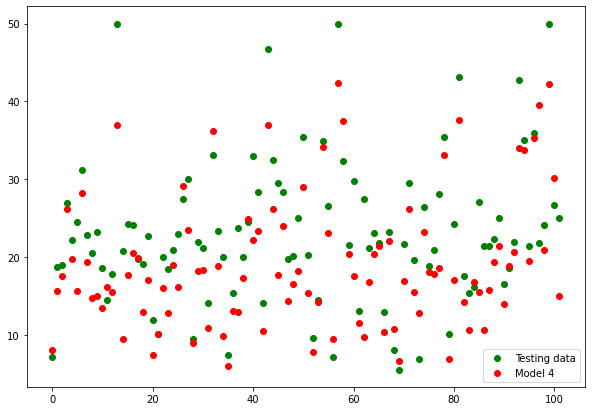

In [81]:
y_pred = model_4.predict(X_test_norm)

t_train = np.arange(y_train.shape[0])
t_test = np.arange(y_test.shape[0])

plt.figure(figsize=(10, 7))
plt.scatter(t_test, y_test, c="g", label="Testing data")
plt.scatter(t_test, y_pred, c="r", label="Model 4")
plt.legend();
plt.show()

In [82]:
y_test[98], y_pred[98]

(24.1, array([20.96559], dtype=float32))

Will repeat the process for model_4 but change loss from mae to mse to check the performance

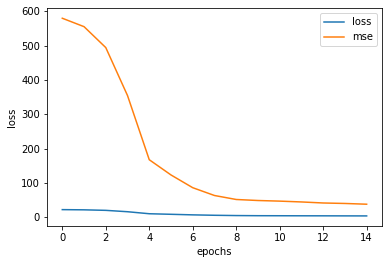

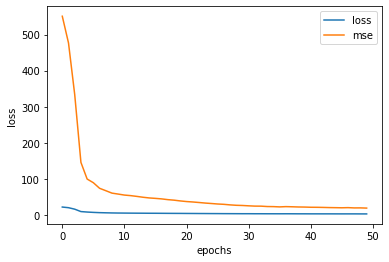

In [109]:
model_4_new = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])
model_4_new2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])

model_4_new.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])
model_4_new2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])

history_4_new = model_4_new.fit(X_train_norm, y_train, epochs=15, verbose=0)
history_4_new2 = model_4_new2.fit(X_train_norm, y_train, epochs=50, verbose=0)

pd.DataFrame(history_4_new.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()
pd.DataFrame(history_4_new2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()

In [110]:
test_4_new = model_4_new.evaluate(X_test_norm, y_test)
test_4_new2 = model_4_new2.evaluate(X_test_norm, y_test)

test_4_new, test_4_new2

4/4 [==============================] - 0s 3ms/step - loss: 5.1492 - mse: 38.7854


([5.901621341705322, 55.863059997558594],
 [5.149237632751465, 38.78540802001953])

In [111]:
model_results = [['model_4', *test_4], 
                 ['model_4_new', *test_4_new],
                 ['model_4_new2', *test_4_new2]]

compare_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
compare_results

,model,mae,mse
0,model_4,4.630690,34.949440
1,model_4_new,5.901621,55.863060
2,model_4_new2,5.149238,38.785408


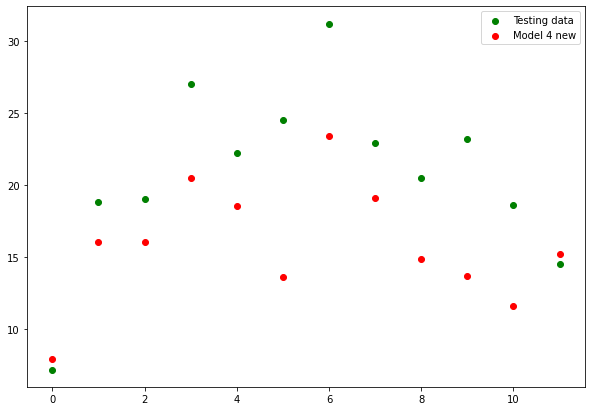

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

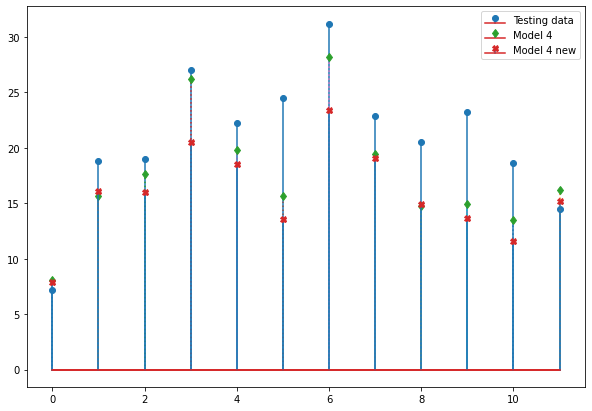

In [123]:
y_pred_new = model_4_new.predict(X_test_norm)
y_pred = model_4.predict(X_test_norm)

t_train = np.arange(y_train.shape[0])
t_test = np.arange(y_test.shape[0])

plt.figure(figsize=(10, 7))
plt.scatter(t_test[:12], y_test[:12], c="g", label="Testing data")
plt.scatter(t_test[:12], y_pred_new[:12], c="r", label="Model 4 new")
plt.legend();
plt.show()

plt.figure(figsize=(10, 7))
plt.stem(t_test[:12], y_test[:12], label="Testing data")
plt.stem(t_test[:12], y_pred[:12], markerfmt="d", linefmt=':', label="Model 4")
plt.stem(t_test[:12], y_pred_new[:12], markerfmt="X", label="Model 4 new")
plt.legend();
plt.show()

In [67]:
model_4.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_203 (Dense)           (None, 20)                280       
                                                                 
 dense_204 (Dense)           (None, 100)               2100      
                                                                 
 dense_205 (Dense)           (None, 50)                5050      
                                                                 
 dense_206 (Dense)           (None, 5)                 255       
                                                                 
 dense_207 (Dense)           (None, 1)                 6         
                                                                 
Total params: 7,691
Trainable params: 7,691
Non-trainable params: 0
_________________________________________________________________


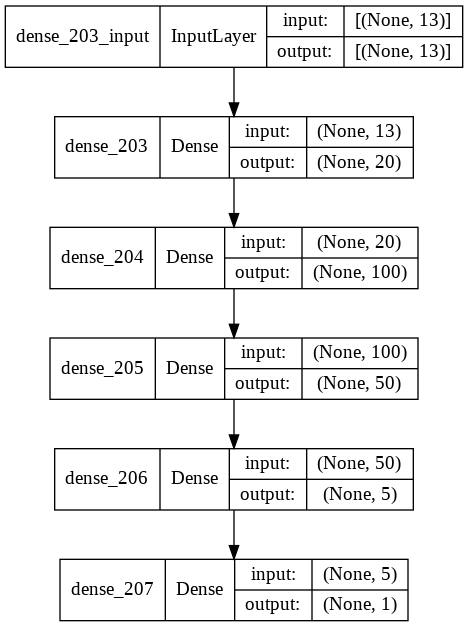

In [68]:
plot_model(model_4, show_shapes=True)

In [69]:
# Save the model
!mkdir -p saved_model
project_path = '/content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression'
model_4.save(project_path + '/saved_model/My_model_on_database')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Udemy: TensorFlow/02. Regression/saved_model/My_model_on_database/assets
